# Plotting
`navis` lets you plot neurons in 2d using `matplotlib` (nice for figures), and in 3d using either `plotly` when in a notebook environment like Deepnote or using a `vispy`-based 3D viewer when using a Python terminal. The `vispy` solution won't work in Deepnote so we will focus on `matplotlib`'s 2d and `plotly` for 3d.

In [ ]:
import navis

# This is relevant because Deepnote does not (yet) support fancy progress bars
navis.set_pbars(jupyter=False)

# Load one of the example neurons shipped with navis
n = navis.example_neurons(1, kind='skeleton')

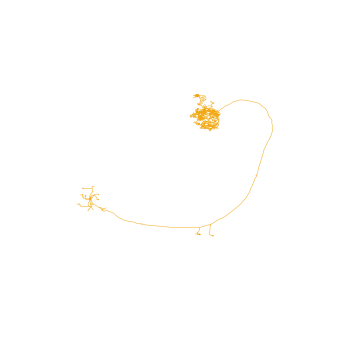

In [ ]:
# Make a 2d plot 
fig, ax = navis.plot2d(n)

# Note that this is equivalent to 
# fig, ax = n.plot2d()

If you have seen an olfactory projection neuron before, you might have noticed that this neuron is upside-down. That's because hemibrain neurons have an odd orienation in that the anterior-posterior axis not the z- but the y-axis (they have been image from above).

For us that just means we have to turn the camera ourselves if we want a frontal view:

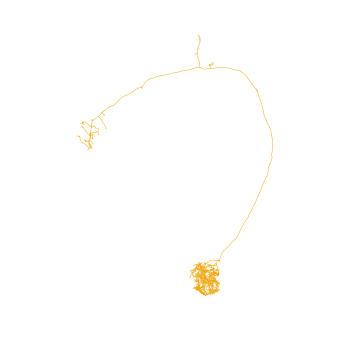

In [ ]:
# Make a 2d plot 
fig, ax = navis.plot2d(n)

# Change camera (azimuth + elevation)
ax.azim, ax.elev = -90, -90

Let's do the same in 3d:

In [ ]:
# Get a list of neurons
nl = navis.example_neurons(5)

# Plot
navis.plot3d(nl, width=1000)

Navigation:
- left click and drag to rotate (select "Orbital rotation" above the legend to make your life easier)
- mousewheel to zoom
- middle-mouse + drag to translate 
- click legend items (single or double) to hide/unhide

Above plots are very basic examples but there are a ton of ways to tweak things to your liking. For a full list of parameters check out the docs for [`plot2d`](https://navis.readthedocs.io/en/latest/source/tutorials/generated/navis.plot2d.html#navis.plot2d) and [`plot3d`](https://navis.readthedocs.io/en/latest/source/tutorials/generated/navis.plot3d.html#navis.plot3d).


Let's for example change the colors. In general, colors can be:
- a string - e.g. `"red"` or just `"r"`
- an rgb/rgba tuple - e.g. `(1, 0, 0)` for red


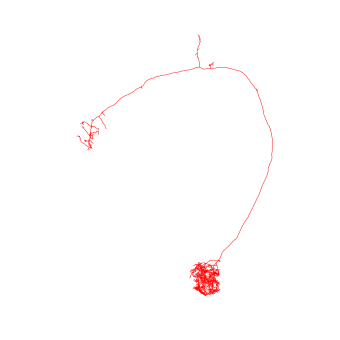

In [ ]:
# Plot all neurons in red
fig, ax = navis.plot2d(n, color='r')
ax.azim, ax.elev = -90, -90

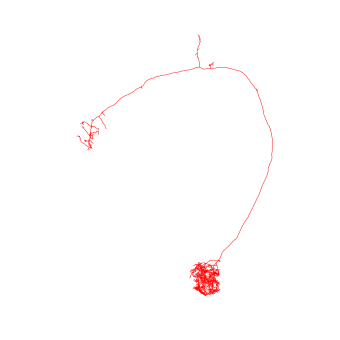

In [ ]:
# Plot all neurons in red (color as tuple)
fig, ax = navis.plot2d(n, color=(1, 0, 0, 1))
ax.azim, ax.elev = -90, -90

When plotting multiple neurons you can either use:
- a single color (`"r"` or `(1, 0, 0)`) -> assigned to all neurons
- a list of colors (`['r', 'yellow', (0, 0, 1)]`) with a color for _each_ neuron 
- a dictionary mapping neuron IDs to colors (`{1734350788: 'r', 1734350908: (1, 0, 1)}`)
- the name of a `matplotlib` or `seaborn` color palette

In [ ]:
# Plot with a specific color palette
navis.plot3d(nl, color='jet')

Exercises:

1. Assign rainbow colors - `"red"`, `"orange"`, `"yellow"`, `"green"` and `"blue"` - as list
2. Use a dictionary to make neurons `1734350788` and `1734350908` green, and neurons `722817260`, `754534424` and `754538881` red

## Volumes 
`plot2d` and `plot3d` also let you plot meshes. Internally these are represented as `navis.Volumes` (a subclass of `trimesh.Trimesh`):

In [ ]:
# navis ships with a neuropil volume (in hemibrain space)
vol = navis.example_volume('neuropil')
vol

<navis.Volume(name=neuropil, color=(0.85, 0.85, 0.85, 0.2), vertices.shape=(8997, 3), faces.shape=(18000, 3))>

To plot, simply pass it to the respective plotting function:

In [ ]:
navis.plot3d([nl, vol])

Under the hood, `Volumes` are treated a bit differently from neurons. So if you want to change the color, you need to do so on the object:

In [ ]:
# Give the neuropil a reddish color
vol.color = (1, .8, .8, .4)

navis.plot3d([nl, vol], width=800)

## Scatter plots 
Because scatter plots are a common way of visualizing 3D data, both `plot2d` and `plot3d` provide a quick interface: `(N, 3)` `numpy` arrays and `pandas.DataFrames` with `x`, `y`, and `z` columns are interpreted as data for a scatter plot:

In [ ]:
# Get all branch points from the node table
bp = n.branch_points
bp.head()

node_id label             x             y             z      radius  \
5         6     5  15678.400391  37086.300781  28349.400391   48.011600   
8         9     5  15159.400391  36641.500000  28392.900391  231.296997   
9        10     5  15144.000000  36710.000000  28142.000000  186.977005   
10       11     5  15246.400391  36812.398438  28005.500000  104.261002   
11       12     5  15284.000000  36850.000000  27882.000000   53.245602   

    parent_id    type  
5           5  branch  
8           8  branch  
9           9  branch  
10         10  branch  
11         11  branch

In [ ]:
# Since `bp` contains x/y/z columns, we can pass it directly to the plotting functions 
navis.plot3d([n, bp],
             c='k',  # make the neuron black 
             scatter_kws=dict(color='r')  # make the markers red
             )

## Fine-tuning figures
`plot2d` and `plot3d` provide a high-level interface to get your neurons on/in a matplotlib or a plotly figure, respectively. You can always use lower-level matplotlib/plotly interfaces directly to add more data or manipulate the figure. Just a cheap example:

Text(0.5, 0, 'z-axis [8 nm voxels]')

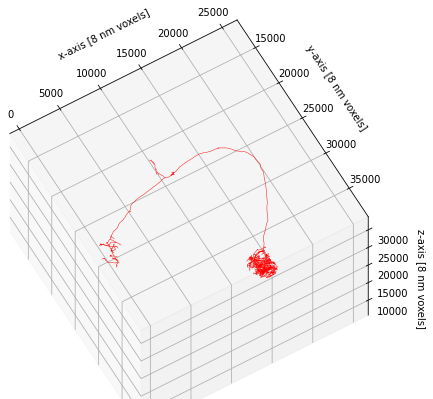

In [ ]:
# Plot neuron on a matplotlib figure
fig, ax = navis.plot2d(n, color='r')

# Show the neuron at a slight angle
ax.azim, ax.elev = -60, -60

# Zoom out a bit more
ax.dist = 8  # default is 7

# Unhide axes 
ax.set_axis_on()

# Label the axes
ax.set_xlabel('x-axis [8 nm voxels]')
ax.set_ylabel('y-axis [8 nm voxels]')
ax.set_zlabel('z-axis [8 nm voxels]')

This concludes this brief introduction to plotting but just to note that `plot2d` and `plot3d` have a lot of additional functionality to customize the way neurons are plotted. If you have time on your hands, I recommend you check out and play around with the available parameters (e.g. `linewidth`, `color_by`, `shade_by`, `linestyle`).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=488665c1-7dc0-42d2-8709-ac706e020c6e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>